<a href="https://colab.research.google.com/github/Raposones/Inteligencia-Artificial-2022.2/blob/master/An%C3%A1lise_MegaWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de dados - MegaWind - Reparo de p√°s e√≥licas

> Autor: Raphael Carvalho Garcia <br>
Email: raphaelgarcia0607@gmail.com<br>
Github: https://github.com/Raposones

Este material √© o projeto para entrega no bootcamp Gera√ß√£o Tech Unimed-BH - Ci√™ncia de Dados, da plataforma DIO - Digital Innovation One. Os dados fornecidos s√£o apenas exemplos para a realiza√ß√£o do projeto.

# Importando bibliotecas, lendo arquivos e resolvendo problemas

In [ ]:
#Importando bibliotecas e arquivos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Usando um estilo diferente para matplot
plt.style.use('bmh')

#encoding √© 'latin' pois a codifica√ß√£o padr√£o utf-8 n√£o aceita acentos
df = pd.read_csv("REPARO DE P√ÅS ENERPLAN.csv", encoding='latin', sep=';')
df.head()

Wind Park  WTG ID  Blade SN Blade Model Section  \
0  COMPLEXO E√ìLICO PONTAL  P2B-02      2035      48.7XL      LE   
1  COMPLEXO E√ìLICO PONTAL  P2B-02      2035      48.7XL      LE   
2  COMPLEXO E√ìLICO PONTAL  P2B-02      2035      48.7XL      LE   
3  COMPLEXO E√ìLICO PONTAL  P2B-02      2035      48.7XL      LE   
4  COMPLEXO E√ìLICO PONTAL  P2B-02      2035      48.7XL      LE   

                                           Image URL                Type  \
0  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Peeling   
1  https://winddataimgwindeuprd.blob.core.windows...               Fungi   
2  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   
3  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   
4  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   

  Location(m)  Length(mm)  Width(mm)  
0       13,82        6000        500  
1        17,8        2007        841  
2       23,41         120         10  
3       21,44          60         10  
4       25,03         500         10

In [ ]:
#Renomeando colunas para portugu√™s
df = df.rename(columns={'Wind Park':'Parque E√≥lico', 'Blade SN':'SN da l√¢mina', 'Blade Model':'Modelo', 'Section': 'Se√ß√£o', 'Image URL': 'Link da imagem', 
                   'Type':'Tipo', 'Location(m)':'Altura(m)', 'Length(mm)':'Comprimento(mm)', 'Width(mm)':'Largura(mm)'})
df.head()

Parque E√≥lico  WTG ID  SN da l√¢mina  Modelo Se√ß√£o  \
0  COMPLEXO E√ìLICO PONTAL  P2B-02          2035  48.7XL    LE   
1  COMPLEXO E√ìLICO PONTAL  P2B-02          2035  48.7XL    LE   
2  COMPLEXO E√ìLICO PONTAL  P2B-02          2035  48.7XL    LE   
3  COMPLEXO E√ìLICO PONTAL  P2B-02          2035  48.7XL    LE   
4  COMPLEXO E√ìLICO PONTAL  P2B-02          2035  48.7XL    LE   

                                      Link da imagem                Tipo  \
0  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Peeling   
1  https://winddataimgwindeuprd.blob.core.windows...               Fungi   
2  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   
3  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   
4  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Pitting   

  Altura(m)  Comprimento(mm)  Largura(mm)  
0     13,82             6000          500  
1      17,8             2007          841  
2     23,41              120           10  
3     21,44               60           10  
4     25,03              500           10

In [ ]:
#Checando tipos em cada coluna
df.dtypes

Parque E√≥lico      object
WTG ID             object
SN da l√¢mina        int64
Modelo             object
Se√ß√£o              object
Link da imagem     object
Tipo               object
Altura(m)          object
Comprimento(mm)     int64
Largura(mm)         int64
dtype: object

Ao checar os tipos em cada coluna, podemos fazer algumas modifica√ß√µes:
- SN da l√¢mina est√° como inteiro, mas podemos modificar para string, visto que o n√∫mero serial de algo √© √∫nico e n√£o desejamos realizar nenhum c√°lculo com ele;
- Altura (em metros) est√° como string, √© necess√°rio us√°-la como float para realizar c√°lculos (como altura m√©dia, achar a menor altura, etc) O fato de possuir v√≠rgula o faz do tipo float, e n√£o integer.

In [ ]:
#Fun√ß√£o para trocar v√≠rgulas por pontos. Por conven√ß√£o, n√∫meros flutuantes utilizam ponto.
#Ao tentar converter de string para float, d√° erro se o valor possuir v√≠rgula, portanto ser√° necess√°rio troc√°-los para ponto.
df['Altura(m)'] = df['Altura(m)'].str.replace(',', '.')

#Modificando tipos das colunas
df = df.astype({'SN da l√¢mina':object, 'Altura(m)':float})
df['Altura(m)'] = df['Altura(m)']
df.dtypes

Parque E√≥lico       object
WTG ID              object
SN da l√¢mina        object
Modelo              object
Se√ß√£o               object
Link da imagem      object
Tipo                object
Altura(m)          float64
Comprimento(mm)      int64
Largura(mm)          int64
dtype: object

Ao tentar, por exemplo, analisar a altura m√©dia de cada tipo de defeito, temos o seguinte:

In [ ]:
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            34.89
Crack in the laminate             3.73
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               28.31
Top Coat - Peeling               13.02
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64

Temos duplicatas! √â poss√≠vel perceber o erro ao pegar a lista de valores √∫nicos de Tipo:

In [ ]:
list(df['Tipo'].unique())

['Top Coat - Peeling',
 'Fungi',
 'Top Coat - Pitting',
 'Crack in the laminate',
 'Top Coat - Peeling ',
 'Crack in the bonding line',
 'Top Coat - Eorosion in the LE',
 'Drain Hole Obstructed',
 'LEP tape- Damaged',
 'Top Coat - Superficial Crack',
 'Delamination ',
 'Crack in the laminate ',
 'Top Coat - Scratch',
 'Seleant cracked']

Ao analisar a lista, podemos perceber que algumas string possuem um espa√ßo em branco no final, deixando os valores como √∫nicos. Para solucionar isso, devemos limpar esses espa√ßos, tornando todos os valores iguais.

In [ ]:
#Usando 'rstrip' para limpar os espa√ßos na direita
df['Tipo'] = df['Tipo'].str.rstrip()

#Verificando a m√©dia novamente, podemos perceber que agora n√£o h√° duplicatas!
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            32.94
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               27.87
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64



# An√°lises
 



##  Quantidade de parques, l√¢minas e problemas diferentes:

In [ ]:
#N√∫mero de parques √∫nicos
num_parques = df['Parque E√≥lico'].nunique()

#Lista com nome dos parques
parques = list(df['Parque E√≥lico'].unique())

#N√∫mero de l√¢minas √∫nicas (por SN)
num_laminas = df['SN da l√¢mina'].nunique()

#N√∫mero de tipos de problemas presentes
num_tipos = df['Tipo'].nunique()

#Lista com o nome de cada problema
tipos = list(df['Tipo'].unique())

#Mostrando resultados
print(f'N¬∫ parques: {num_parques}\nParques: {parques}')
print('//'.center(20, '-'))
print(f'N¬∫ de problemas diferentes: {num_tipos}\nTipos de problemas: {tipos}')
print('//'.center(20, '-'))
print(f'N¬∫ l√¢minas com problemas: {num_laminas}')


N¬∫ parques: 1
Parques: ['COMPLEXO E√ìLICO PONTAL']
---------//---------
N¬∫ de problemas diferentes: 12
Tipos de problemas: ['Top Coat - Peeling', 'Fungi', 'Top Coat - Pitting', 'Crack in the laminate', 'Crack in the bonding line', 'Top Coat - Eorosion in the LE', 'Drain Hole Obstructed', 'LEP tape- Damaged', 'Top Coat - Superficial Crack', 'Delamination', 'Top Coat - Scratch', 'Seleant cracked']
---------//---------
N¬∫ l√¢minas com problemas: 18


Poder√≠amos analisar cada parque, mas como h√° apenas um, n√£o ser√° necess√°rio. 

Com esta an√°ise, conclu√≠mos que h√° um total de 18 l√¢minas diferentes, e um total de 12 problemas diferentes para cada l√¢mina.

## Quantidade de problemas em l√¢minas por modelo

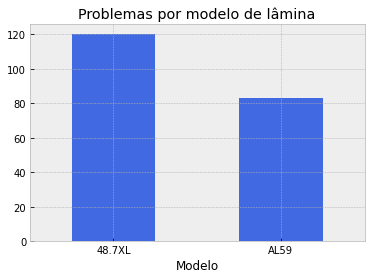

In [ ]:
df.groupby('Modelo')['Tipo'].size().plot.bar(title='Problemas por modelo de l√¢mina', color='royalblue')
plt.xticks(rotation='0');

O modelo 48.7XL apresenta mais problemas do que o modelo AL59.

## Compara√ß√£o de problemas por quantidade

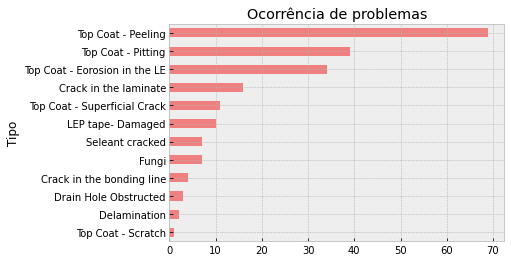

In [ ]:
#Problema x quantidade, ordenado de maior para menor
df_problemas = df.groupby('Tipo')['Tipo'].size().sort_values()
df_problemas.plot.barh(title="Ocorr√™ncia de problemas", color='lightcoral');

Comparando os problemas, percebemos que o problema **Top Coat - Peeling (camada superior descascando) √© o mais frequente**, enquanto **Top Coat - Scratch (camada superior coom arranh√¥es) √© o que menos acontece**.

## Analisando a altura, comprimento e largura dos problemas


### -> Altura, comprimento e largura m√©dia

In [ ]:
#Usando o metodo describe, retornar uma lista com as medias (feitas no dataset com colunas de n√∫meros reais)
medias = list(df.describe().mean().round(2))

#Ordem da lista medias: altura m√©dia -> comprimento m√©dio -> largura m√©dia
alt_med = medias[0]
comp_med = medias[1]
larg_med = medias[2]

print(f'Altura m√©dia da localiza√ß√£o dos problemas: {alt_med} metros;')
print(f'Comprimento m√©dio dos problemas: {comp_med} mil√≠metros;')
print(f'Largura m√©dia dos problemas: {larg_med} mil√≠metros;')

Altura m√©dia da localiza√ß√£o dos problemas: 53.23 metros;
Comprimento m√©dio dos problemas: 1374.59 mil√≠metros;
Largura m√©dia dos problemas: 912.3 mil√≠metros;


### -> Compara√ß√£o entre problema mais alto e mais baixo, e maior e menor

In [ ]:
#Problema localizado na maior altura
df[df['Altura(m)']==df['Altura(m)'].max()]


Parque E√≥lico  WTG ID SN da l√¢mina Modelo Se√ß√£o  \
161  COMPLEXO E√ìLICO PONTAL  P2A-05         1608   AL59    SS   
178  COMPLEXO E√ìLICO PONTAL  PA2-04         1832   AL59    SS   

                                        Link da imagem             Tipo  \
161  https://winddataimgwindeuprd.blob.core.windows...  Seleant cracked   
178  https://winddataimgwindeuprd.blob.core.windows...  Seleant cracked   

     Altura(m)  Comprimento(mm)  Largura(mm)  
161      58.92               10          290  
178      58.92               10          290

In [ ]:
#Problema localizado na menor altura
df[df['Altura(m)']==df['Altura(m)'].min()]

Parque E√≥lico  WTG ID SN da l√¢mina  Modelo Se√ß√£o  \
22  COMPLEXO E√ìLICO PONTAL  P2B-02         2364  48.7XL    LE   

                                       Link da imagem                Tipo  \
22  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Peeling   

    Altura(m)  Comprimento(mm)  Largura(mm)  
22       1.94              500          500

Para efeitos de teste, consideramos que os problemas estejam em forma retangular. Assim, podemos calcular sua √°rea no formato **area = comprimento x largura** e ent√£o descobrir a maior e menor √°rea. Iremos adicionar a √°rea em uma nova coluna do DataFrame original.

In [ ]:
#Adicionando coluna '√Årea(mm)'
df['Area(mm)'] = df['Comprimento(mm)'] * df['Largura(mm)']
df.sample(10)

Parque E√≥lico  WTG ID SN da l√¢mina  Modelo Se√ß√£o  \
33   COMPLEXO E√ìLICO PONTAL  P2B-02         2364  48.7XL    LE   
156  COMPLEXO E√ìLICO PONTAL  P2A-05         1608    AL59    LE   
67   COMPLEXO E√ìLICO PONTAL  P3B-05         1602    AL59    LE   
183  COMPLEXO E√ìLICO PONTAL  P2A-01         1618    AL59    LE   
189  COMPLEXO E√ìLICO PONTAL  P2A-01         1618    AL59    PS   
6    COMPLEXO E√ìLICO PONTAL  P2B-02         2035  48.7XL    LE   
201  COMPLEXO E√ìLICO PONTAL  P2A-01         1627    AL59    LE   
69   COMPLEXO E√ìLICO PONTAL  P3B-05         1602    AL59    LE   
20   COMPLEXO E√ìLICO PONTAL  P2B-02         2035  48.7XL    SS   
101  COMPLEXO E√ìLICO PONTAL  P2B-06         2688  48.7XL    LE   

                                        Link da imagem  \
33   https://winddataimgwindeuprd.blob.core.windows...   
156  https://winddataimgwindeuprd.blob.core.windows...   
67   https://winddataimgwindeuprd.blob.core.windows...   
183  https://winddataimgwindeuprd.blob.core.windows...   
189  https://winddataimgwindeuprd.blob.core.windows...   
6    https://winddataimgwindeuprd.blob.core.windows...   
201  https://winddataimgwindeuprd.blob.core.windows...   
69   https://winddataimgwindeuprd.blob.core.windows...   
20   https://winddataimgwindeuprd.blob.core.windows...   
101  https://winddataimgwindeuprd.blob.core.windows...   

                              Tipo  Altura(m)  Comprimento(mm)  Largura(mm)  \
33              Top Coat - Peeling      31.03              740           70   
156             Top Coat - Pitting      47.58               20           10   
67   Top Coat - Eorosion in the LE      57.63             1000           30   
183             Top Coat - Pitting      40.59             1000           10   
189   Top Coat - Superficial Crack      39.31               50           50   
6               Top Coat - Peeling      22.76             6000          242   
201  Top Coat - Eorosion in the LE      57.81             1500           50   
69                           Fungi      15.69             4000         1000   
20              Top Coat - Peeling      30.60              360          788   
101   Top Coat - Superficial Crack      11.41               75           10   

     Area(mm)  
33      51800  
156       200  
67      30000  
183     10000  
189      2500  
6     1452000  
201     75000  
69    4000000  
20     283680  
101       750

In [ ]:
#Maior problema (maior √°rea)
df[df['Area(mm)']==df['Area(mm)'].max()]

Parque E√≥lico  WTG ID SN da l√¢mina  Modelo Se√ß√£o  \
12  COMPLEXO E√ìLICO PONTAL  P2B-02         2035  48.7XL    PS   

                                       Link da imagem                Tipo  \
12  https://winddataimgwindeuprd.blob.core.windows...  Top Coat - Peeling   

    Altura(m)  Comprimento(mm)  Largura(mm)  Area(mm)  
12      17.51             6000         2966  17796000

In [ ]:
#Menor problema (menor √°rea)
df[df['Area(mm)']==df['Area(mm)'].min()]

Parque E√≥lico  WTG ID SN da l√¢mina  Modelo Se√ß√£o  \
47   COMPLEXO E√ìLICO PONTAL  P2B-02         2364  48.7XL    PS   
52   COMPLEXO E√ìLICO PONTAL  P2B-02         2364  48.7XL    SS   
84   COMPLEXO E√ìLICO PONTAL  P3B-05         1615    AL59    LE   
123  COMPLEXO E√ìLICO PONTAL  P2B-06         2396  48.7XL    PS   
150  COMPLEXO E√ìLICO PONTAL  P2B-07         2940  48.7XL    LE   
199  COMPLEXO E√ìLICO PONTAL  P2A-01         1626    AL59    SS   
202  COMPLEXO E√ìLICO PONTAL  P2A-01         1627    AL59    PS   

                                        Link da imagem  \
47   https://winddataimgwindeuprd.blob.core.windows...   
52   https://winddataimgwindeuprd.blob.core.windows...   
84   https://winddataimgwindeuprd.blob.core.windows...   
123  https://winddataimgwindeuprd.blob.core.windows...   
150  https://winddataimgwindeuprd.blob.core.windows...   
199  https://winddataimgwindeuprd.blob.core.windows...   
202  https://winddataimgwindeuprd.blob.core.windows...   

                             Tipo  Altura(m)  Comprimento(mm)  Largura(mm)  \
47          Drain Hole Obstructed      48.37               10           10   
52             Top Coat - Peeling      42.89               10           10   
84             Top Coat - Pitting      31.57               10           10   
123            Top Coat - Pitting       6.07               10           10   
150            Top Coat - Pitting      29.60               10           10   
199            Top Coat - Pitting      24.71               10           10   
202  Top Coat - Superficial Crack      41.54               10           10   

     Area(mm)  
47        100  
52        100  
84        100  
123       100  
150       100  
199       100  
202       100

In [ ]:
#M√©dia de √°rea dos problemas
area_media = df['Area(mm)'].mean().round(2)
print(f'√Årea m√©dia de problemas por l√¢mina: {area_media}mm')
print(f'√Årea m√©dia de problemas por l√¢mina, em metros: {area_media // 1000}m')


√Årea m√©dia de problemas por l√¢mina: 603792.05mm
√Årea m√©dia de problemas por l√¢mina, em metros: 603.0m


A √°rea media dos problemas por l√¢mina √© de 603792.05 mil√≠metros, ou 603 metros.

### -> Area m√©dia por problema

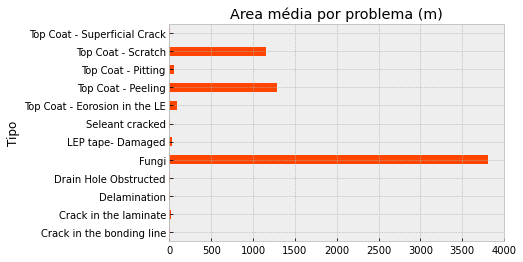

In [ ]:
#Para representat melhor os dados, vamos representar a √°rea de mil√≠metros para metros (dividindo por 1000)
#E, ent√£o, inserir a area por metro em uma nova coluna no dataset
df['Area(m)'] = df['Area(mm)'] // 1000
df.groupby('Tipo')['Area(m)'].mean().round(2).plot.barh(title='Area m√©dia por problema (m)', color='orangered')

Podemos notar que o problema com tamanho m√©dio maior √© o de fungos, indicando que este problema geralmente tem uma √°rea maior do que as outras. Os problemas de descascamento e arranh√µes seguem como os maiores atr√°s.

Em contrapartida, a maioria dos outros problemas s√£o pouco ou n√£o vis√≠veis no gr√°fico, indicando que, no geral, estes problemas s√£o menores.

## Comparando l√¢minas e seus problemas

### -> Problemas x l√¢minas

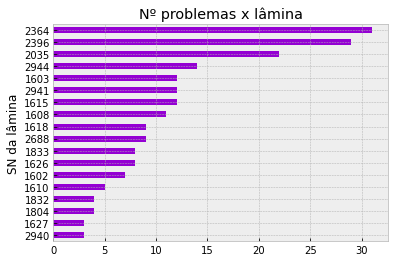

In [ ]:
df.groupby('SN da l√¢mina')['Tipo'].size().sort_values().plot.barh(title='N¬∫ problemas x l√¢mina', color='darkviolet');

A l√†mina 2364 apresentou o maior n√∫mero de problemas, enquanto a l√¢mina 2940 apresentou o menor n√∫mero.

In [ ]:
media = int(df.groupby('SN da l√¢mina')['Tipo'].size().mean())
print(f'M√©dia de problemas por l√¢mina: {media}')

M√©dia de problemas por l√¢mina: 11


Podemos concluir que cada l√¢mina tem, em m√©dia, 11 problemas.

### -> Gr√°fico de compara√ß√£o de cada problema, para cada l√¢mina

In [ ]:
#Transformando em um DataSet onde analisamos, para cada l√¢mina (por SN), cada problema envolvido nesta l√¢mina
df_blades = df[['SN da l√¢mina', "Tipo"]]
df_blades = df_blades.groupby([pd.Categorical(df['SN da l√¢mina']), 'Tipo']).size().reset_index(name='N¬∫ ocorrencias')

#Renomeando coluna de volta para SN de l√¢minas
df_blades = df_blades.rename(columns={'level_0':'SN da l√¢mina'})
df_blades.head(25)

SN da l√¢mina                           Tipo  N¬∫ ocorrencias
0          1602      Crack in the bonding line               0
1          1602          Crack in the laminate               0
2          1602                   Delamination               0
3          1602          Drain Hole Obstructed               1
4          1602                          Fungi               1
5          1602              LEP tape- Damaged               0
6          1602                Seleant cracked               0
7          1602  Top Coat - Eorosion in the LE               3
8          1602             Top Coat - Peeling               0
9          1602             Top Coat - Pitting               1
10         1602             Top Coat - Scratch               0
11         1602   Top Coat - Superficial Crack               1
12         1603      Crack in the bonding line               0
13         1603          Crack in the laminate               1
14         1603                   Delamination               0
15         1603          Drain Hole Obstructed               1
16         1603                          Fungi               1
17         1603              LEP tape- Damaged               0
18         1603                Seleant cracked               0
19         1603  Top Coat - Eorosion in the LE               6
20         1603             Top Coat - Peeling               0
21         1603             Top Coat - Pitting               3
22         1603             Top Coat - Scratch               0
23         1603   Top Coat - Superficial Crack               0
24         1608      Crack in the bonding line               0

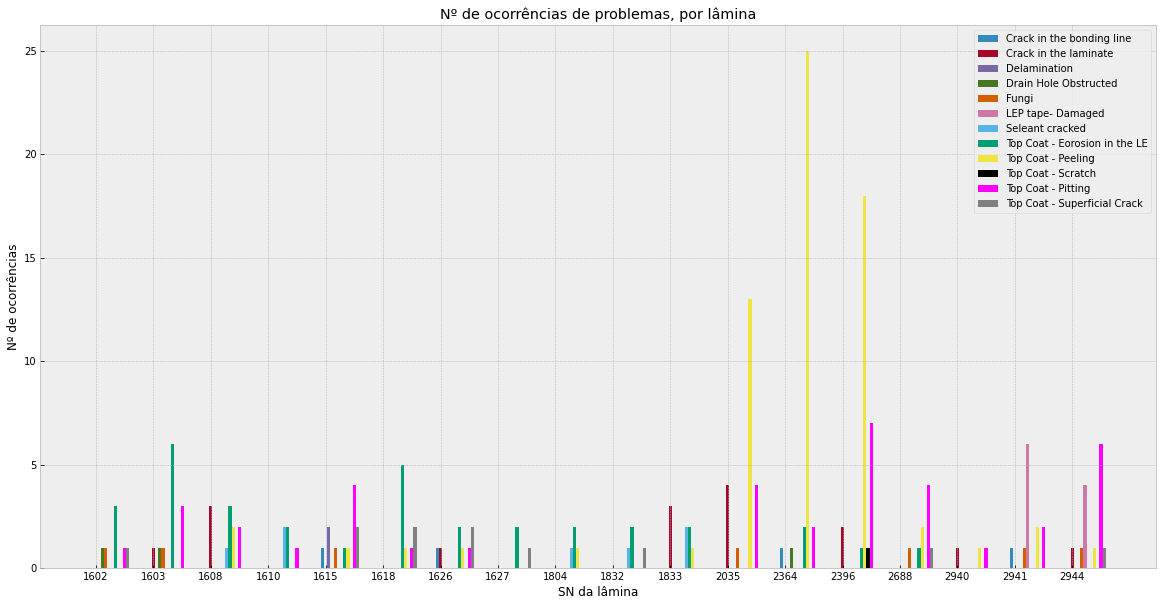

In [ ]:


#Lista de l√¢minas
blades = list(df_blades['SN da l√¢mina'].unique())

#Lista de ocorr√™ncias em cada problema
line_crack = list(df_blades.loc[df_blades['Tipo'] == 'Crack in the bonding line']['N¬∫ ocorrencias'])
lam_crack = list(df_blades.loc[df_blades['Tipo'] == 'Crack in the laminate']['N¬∫ ocorrencias'])
delam = list(df_blades.loc[df_blades['Tipo'] == 'Delamination']['N¬∫ ocorrencias'])
obstruct = list(df_blades.loc[df_blades['Tipo'] == 'Drain Hole Obstructed']['N¬∫ ocorrencias'])
fungi = list(df_blades.loc[df_blades['Tipo'] == 'Fungi']['N¬∫ ocorrencias'])
LEP_damage = list(df_blades.loc[df_blades['Tipo'] == 'LEP tape- Damaged']['N¬∫ ocorrencias'])
seal_crack = list(df_blades.loc[df_blades['Tipo'] == 'Seleant cracked']['N¬∫ ocorrencias'])
tc_erosion = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Eorosion in the LE']['N¬∫ ocorrencias'])
tc_peel = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Peeling']['N¬∫ ocorrencias'])
tc_scratch = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Scratch']['N¬∫ ocorrencias'])
tc_pitt = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Pitting']['N¬∫ ocorrencias'])
tc_superf = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Superficial Crack']['N¬∫ ocorrencias'])

problems = df_blades['Tipo'].unique()

#Cria√ß√£o do gr√°fico
#Gerar figura
fig = plt.figure(figsize=(20,10))

#N√∫mero de conjunto de barras (cada conjunto √© uma l√¢mina)
N = len(blades)

#Barras no eixo x
ind = np.arange(N)

#Largura de cada barra
#Esse m√©todo acha sempre o melhor width poss√≠vel (n√£o entendi como)
width = np.min(np.diff(range(len(blades))))/len(blades)

#Criando barras
plt.bar(ind, line_crack, width, label='Crack in the bonding line',)
plt.bar(ind + width, lam_crack, width, label='Crack in the laminate')
plt.bar(ind + width*2, delam, width, label='Delamination')
plt.bar(ind + width*3, obstruct, width, label='Drain Hole Obstructed')
plt.bar(ind + width*4, fungi, width, label='Fungi')
plt.bar(ind + width*5, LEP_damage, width, label='LEP tape- Damaged')
plt.bar(ind + width*6, seal_crack, width, label='Seleant cracked')
plt.bar(ind + width*7, tc_erosion, width, label='Top Coat - Eorosion in the LE')
plt.bar(ind + width*8, tc_peel, width, label='Top Coat - Peeling')
plt.bar(ind + width*9, tc_scratch, width, label='Top Coat - Scratch', color='black')
plt.bar(ind + width*10, tc_pitt, width, label='Top Coat - Pitting', color='magenta')
plt.bar(ind + width*11, tc_superf, width, label='Top Coat - Superficial Crack', color='grey')

#Nomeando eixo x e y
plt.xlabel('SN da l√¢mina')
plt.ylabel('N¬∫ de ocorr√™ncias')
plt.title('N¬∫ de ocorr√™ncias de problemas, por l√¢mina')

#Posi√ß√£o dos nomes do eixo X
plt.xticks(ind + width, blades)

#Mostrando legendas no melhor lugar
plt.legend(loc='best')
plt.show()

> **Nota**: esse gr√°fico √© apenas por puro aprendizado. Algumas barras podem estar mal colocadas, e os nomes no eixo X n√£o est√£o perfeitamente alinhados. Al√©m disso, a etsrat√©gia utilizada para criar as barras pode n√£o ser a melhor.

Embora seja um gr√°fico complicado para analisar em detalhes, em uma vis√£o geral podemos notar algumas coisas:

- o problema de camadas descascadas (Top Coat Peeling - linha amarela), em alguns casos, acontece em maior quantidade quando comparado aos outros problemas;

- √© poss√≠vel vizualizar as cores verde-claro e rosa em grande parte das l√¢minas, indicando que os problemas de eros√£o e corros√£o em cavidades aparecem com mais frequ√™ncia entre uma l√¢mina e outra;

- o descascamento da camada superior √© o √∫nico problema que ocorre mais de 10 vezes. De fato, a maioria dos problemas acontecem bem menos: em m√©dia 1-2 vezes por l√¢mina;

- alguns problemas aparecem muitas poucas vezes. Por exemplo, a linha preta (que indica arranh√¥es na camada superior) aparece uma √∫nica vez, na l√¢mina 2396. Isto indica que n√£o √© um problema comum.


## Bonus

Algumas an√°lises que provavelmente seriam pouco ou n√£o usadas, apenas a fins de estudo.

### -> Altura m√©dia onde cada problema ocorre

In [ ]:
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            32.94
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               27.87
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64

O problema de obstru√ß√£o no ralo acontece em alturas menores, enquanto problemas por fungos acontecem nas menores alturas. Como j√° vimos anteriormente, a altura m√©dia dos problemas √© de 53 metros.

### -> Altura total escalada para resolver problemas

In [ ]:
alt_total = df['Altura(m)'].sum()
print(f'Foram escalados um total de {int(alt_total)} metros.')

#Altura do Everest √© constante
EVEREST = 8849
res = int(EVEREST - alt_total)

#Mostrando resultados, considerando se a altura total √© maior ou menor do que a do Everest
if res < 0:
  print(f'Isso √© equivalente a escalar o Everest inteiro, e mais {-(res)} metros!')
else:
  print(f'Com mais {res} metros, voc√™ escalaria o equivalente ao Everest!')

Foram escalados um total de 7333 metros.
Com mais 1515 metros, voc√™ escalaria o equivalente ao Everest!


√â not√°vel que os problemas est√£o em grandes alturas, e por raz√µes √≥bvias resolvidos por equipes de diversos profissionais. Por√©m, se uma s√≥ pessoa resolvesse todos os problemas deste parque, o total escalado por esta pessoa seria quase equivalente ao Everest, a maior montanha do mundo!

# Considera√ß√µes finais

Com algumas poucas linhas de c√≥digo, √© poss√≠vel analisar, de modo geral, v√°rios aspectos em um dataset, planilha ou carta de v√°rias linhas. Neste caso, analisamos uma planilha de Excel (convertida para formato CSV por quest√µes pr√°ticas) de 201 linhas e 10 colunas, analisando em poucas linhas o que demoraria horas, ou at√© dias para concluir!

<br>

Como meu primeiro projeto de Ci√™ncia de Dados, algumas informa√ß√µes podem n√£o estar inteiramente corretas ou completas, e tamb√©m os m√©todos utilizados para criar os gr√°ficos, ou at√© mesmo os gr√°ficos, podem n√£o ser os de melhor efici√™ncia. Portanto, caro leitor, caso tenha alguma opini√£o, dica ou sugest√£o, sinta-se livre para me contatar!

Obrigado por acompanhar o projeto at√© aqui!
 üôÇ